In [ ]:
pip install numpy matplotlib scikit-learn


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage import io

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


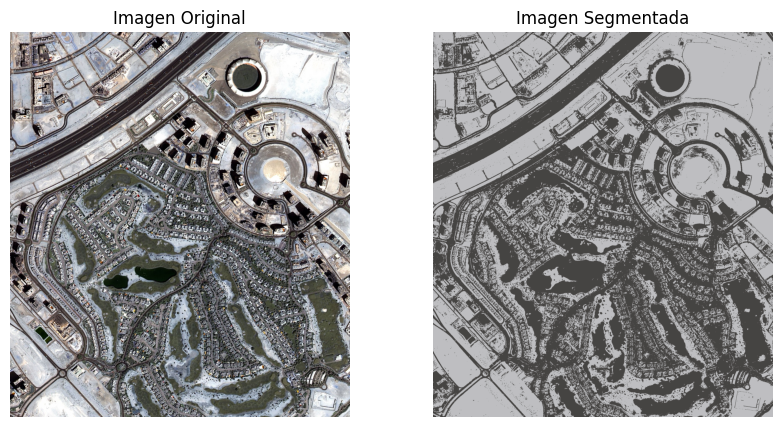

In [12]:
# Cargar la imagen
image = io.imread('/content/Tile_7_image_part_002.jpg')

# Convertir la imagen a una matriz plana de píxeles
original_shape = image.shape
image_flat = np.reshape(image, (-1, 3))

# Normalizar los valores de los píxeles
image_flat = np.array(image_flat, dtype=np.float64) / 255

# Definir el número de segmentos (clusters)
num_clusters = 2

# Inicializar y ajustar el modelo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(image_flat)

# Obtener las etiquetas de los segmentos y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Reconstruir la imagen con los colores de los centroides
segmented_image = centroids[labels].reshape(original_shape)

# Visualizar la imagen original y la imagen segmentada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Segmentada')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()


In [13]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2 as cv

# Cargar la imagen
image = cv.imread('/content/Tile_7_image_part_002.jpg')

# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error al cargar la imagen. Verifica la ruta de la imagen.")
    exit()

# Verificar el formato de la imagen
if len(image.shape) != 3:
    print("La imagen no tiene el formato esperado (no es una imagen a color).")
    exit()

# Convertir la imagen a formato de datos aceptado por OpenCV
image_flat = np.float32(image.reshape((-1, 3)))

# Definir el criterio de convergencia
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Definir el número de clusters
num_clusters = 4

# Ejecutar el algoritmo K-means
_, labels, centroids = cv.kmeans(image_flat, num_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Reconstruir la imagen segmentada
segmented_image = centroids[labels.flatten()].reshape(image.shape)

# Mostrar la imagen original
cv2_imshow(image)

# Mostrar la imagen segmentada
cv2_imshow(segmented_image)

Output hidden; open in https://colab.research.google.com to view.